### Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import gzip

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import sys
pth = '/Users/lky/Desktop/Data Engineering Final Project/' # Change to your local path of the "Data Engineering Final Project" folder
sys.path.append(pth)
ecommerce_behavior_path = pth + 'Data/' + 'ecommerce_behavior'

In [4]:
# Ecommerce Behavior files (very big file)
zf = zipfile.ZipFile(f'{ecommerce_behavior_path}/2019-Nov.csv.zip') 
ecommerce_behavior_df_2019_11 = pd.read_csv(zf.open('2019-Nov.csv'))
print("Ecommerce Behavior 2019-11:")
ecommerce_behavior_df_2019_11.head()

Ecommerce Behavior 2019-11:


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [5]:
with gzip.open(f'{ecommerce_behavior_path}/2019-Dec.csv.gz', 'rt', encoding='utf-8') as f:
    ecommerce_behavior_df_2019_12 = pd.read_csv(f)
ecommerce_behavior_df_2019_12

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80
1,2019-12-01 00:00:00 UTC,view,22700068,2232732091643068746,NaN,force,102.96,577702456,de33debe-c7bf-44e8-8a12-3bf8421f842a
2,2019-12-01 00:00:01 UTC,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76
3,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
4,2019-12-01 00:00:02 UTC,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e
...,...,...,...,...,...,...,...,...,...
67542873,2019-12-31 23:59:58 UTC,view,1005118,2232732093077520756,construction.tools.light,apple,908.80,515771654,06ed2ab3-39f6-4fd4-a755-3a26c72eabc8
67542874,2019-12-31 23:59:58 UTC,view,1307229,2053013554658804075,electronics.audio.headphone,lenovo,1044.25,595160289,c3b5e44a-b97d-44ce-bdfc-d4f8ff669ac0
67542875,2019-12-31 23:59:59 UTC,view,9300104,2053013554524586339,kids.dolls,sony,411.83,526621231,7da1da5a-0d1e-4768-b481-97354e2ef28e
67542876,2019-12-31 23:59:59 UTC,view,4803759,2232732079706079299,sport.bicycle,xiaomi,17.99,574723072,2f967c6e-b6c4-4971-8599-d34f86570e29


In [ ]:
def data_clean(df, month_label):
    # Ensure the event_time column is in datetime format
    df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')  # Convert to datetime, set invalid entries to NaT
    
    # Count unique user_id for each user_session
    user_session_check = df.groupby('user_session')['user_id'].nunique()
    # Identify problematic sessions where there are multiple user_ids
    problematic_sessions = user_session_check[user_session_check > 1].index
    print(f"Problematic user_sessions: {len(problematic_sessions)}")
    
    # Filter out rows with problematic user_sessions
    df_cleaned = df[~df['user_session'].isin(problematic_sessions)]
    print(f"Removed {len(df) - len(df_cleaned)} rows with inconsistent user_session-user_id pairs.")
    
    # Remove rows with missing values in all columns
    df = df_cleaned.dropna()

    # 1. Save `event_time_{month_label}` table
    df['event_year'] = df['event_time'].dt.year
    df['event_month'] = df['event_time'].dt.month
    df['event_day'] = df['event_time'].dt.day
    df['event_hms'] = df['event_time'].dt.strftime('%H:%M:%S')
    
    return df

In [7]:
df_11 = data_clean(ecommerce_behavior_df_2019_11, '2019_11')
df_11

Problematic user_sessions: 591
Removed 1769 rows with inconsistent user_session-user_id pairs.


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_year,event_month,event_day,event_hms
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019,11,1,00:00:00
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019,11,1,00:00:00
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019,11,1,00:00:01
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019,11,1,00:00:01
5,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,2019,11,1,00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67501972,2019-11-30 23:59:57+00:00,view,12301059,2053013556311359947,construction.tools.drill,bosch,266.16,562661595,7165dc28-9cba-40a0-9ed8-76fd909ccb3b,2019,11,30,23:59:57
67501975,2019-11-30 23:59:58+00:00,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359,2019,11,30,23:59:58
67501976,2019-11-30 23:59:59+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,2019,11,30,23:59:59
67501977,2019-11-30 23:59:59+00:00,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0,2019,11,30,23:59:59


In [8]:
df_12 = data_clean(ecommerce_behavior_df_2019_12, '2019_12')
df_12

Problematic user_sessions: 1472
Removed 4263 rows with inconsistent user_session-user_id pairs.


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_year,event_month,event_day,event_hms
0,2019-12-01 00:00:00+00:00,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80,2019,12,1,00:00:00
2,2019-12-01 00:00:01+00:00,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76,2019,12,1,00:00:01
4,2019-12-01 00:00:02+00:00,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e,2019,12,1,00:00:02
5,2019-12-01 00:00:02+00:00,view,100008256,2053013561185141473,accessories.umbrella,ikea,163.56,542860793,a1bcb550-1065-4769-a80a-0ccb4bcee78d,2019,12,1,00:00:02
7,2019-12-01 00:00:03+00:00,view,1005239,2232732093077520756,construction.tools.light,xiaomi,256.38,525740700,370e8c88-3d07-41df-9aaa-2adf5a0bf312,2019,12,1,00:00:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67542873,2019-12-31 23:59:58+00:00,view,1005118,2232732093077520756,construction.tools.light,apple,908.80,515771654,06ed2ab3-39f6-4fd4-a755-3a26c72eabc8,2019,12,31,23:59:58
67542874,2019-12-31 23:59:58+00:00,view,1307229,2053013554658804075,electronics.audio.headphone,lenovo,1044.25,595160289,c3b5e44a-b97d-44ce-bdfc-d4f8ff669ac0,2019,12,31,23:59:58
67542875,2019-12-31 23:59:59+00:00,view,9300104,2053013554524586339,kids.dolls,sony,411.83,526621231,7da1da5a-0d1e-4768-b481-97354e2ef28e,2019,12,31,23:59:59
67542876,2019-12-31 23:59:59+00:00,view,4803759,2232732079706079299,sport.bicycle,xiaomi,17.99,574723072,2f967c6e-b6c4-4971-8599-d34f86570e29,2019,12,31,23:59:59


In [9]:
df_11[['primary_category', 'secondary_category', 'tertiary_category']] = (
    df_11['category_code'].str.split('.', expand=True).iloc[:, :3]  # Ensure only up to 3 columns
)

In [12]:
df_12[['primary_category', 'secondary_category', 'tertiary_category']] = (
    df_12['category_code'].str.split('.', expand=True).iloc[:, :3]  # Ensure only up to 3 columns
)

__1.⁠ ⁠one pie chart diving percentage of categories (top 4) form all sales.
e.g., electronics 20%, beauty+10%, ...__

For November:

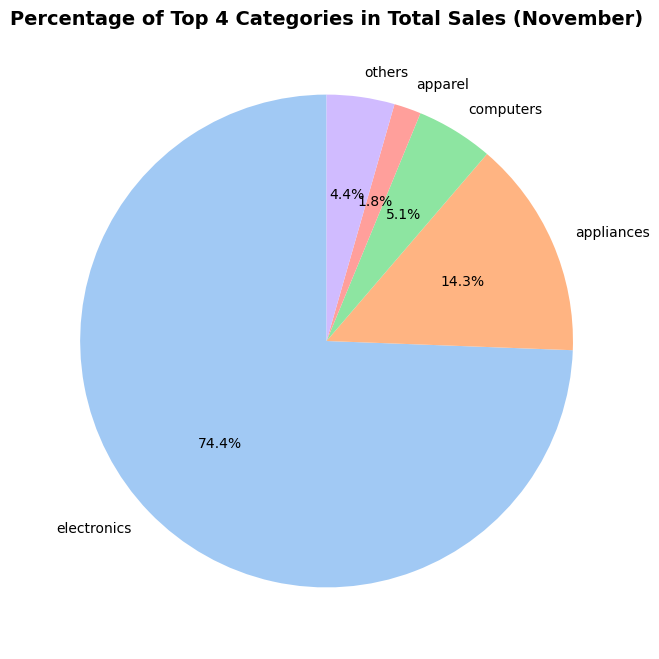

In [13]:
# Calculate total purchases by primary category for November
category_sales_nov = df_11[df_11['event_type'] == 'purchase']['primary_category'].value_counts()

# Select top 4 categories and calculate "others"
top_categories_nov = category_sales_nov.nlargest(4)
other_categories_nov = category_sales_nov.sum() - top_categories_nov.sum()
top_categories_nov['others'] = other_categories_nov

# Create a pie chart with enhanced aesthetics
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:5]
top_categories_nov.plot.pie(autopct='%1.1f%%', labels=top_categories_nov.index, startangle=90, colors=colors)
plt.title('Percentage of Top 4 Categories in Total Sales (November)', fontsize=14, weight='bold')
plt.ylabel('')
plt.show()


For December:

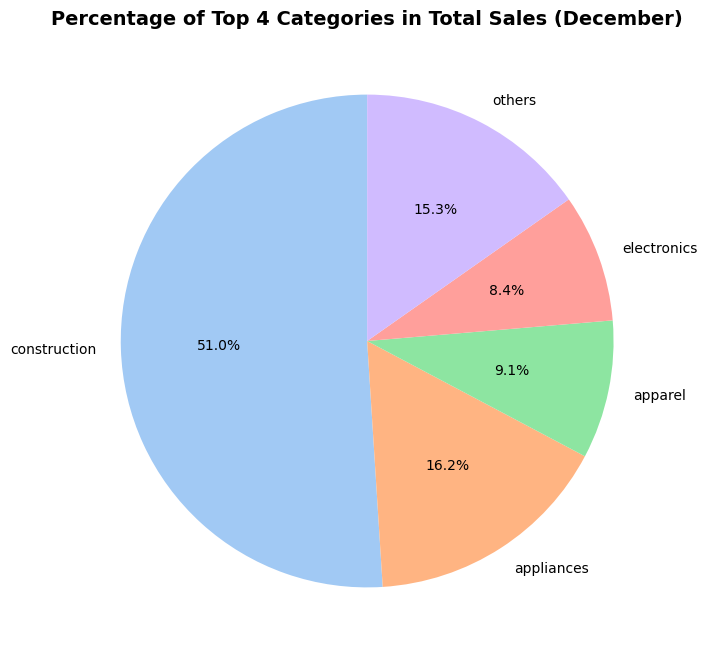

In [17]:
# Calculate total purchases by primary category for December
category_sales_dec = df_12[df_12['event_type'] == 'purchase']['primary_category'].value_counts()

# Select top 4 categories and calculate "others"
top_categories_dec = category_sales_dec.nlargest(4)
other_categories_dec = category_sales_dec.sum() - top_categories_dec.sum()
top_categories_dec['others'] = other_categories_dec

# Create a pie chart with enhanced aesthetics
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:5]
top_categories_dec.plot.pie(autopct='%1.1f%%', labels=top_categories_dec.index, startangle=90, colors=colors)
plt.title('Percentage of Top 4 Categories in Total Sales (December)', fontsize=14, weight='bold')
plt.ylabel('')
plt.show()

__2.⁠ ⁠time series line graph showing the peaks of purchases per top 3 categories__

For November:

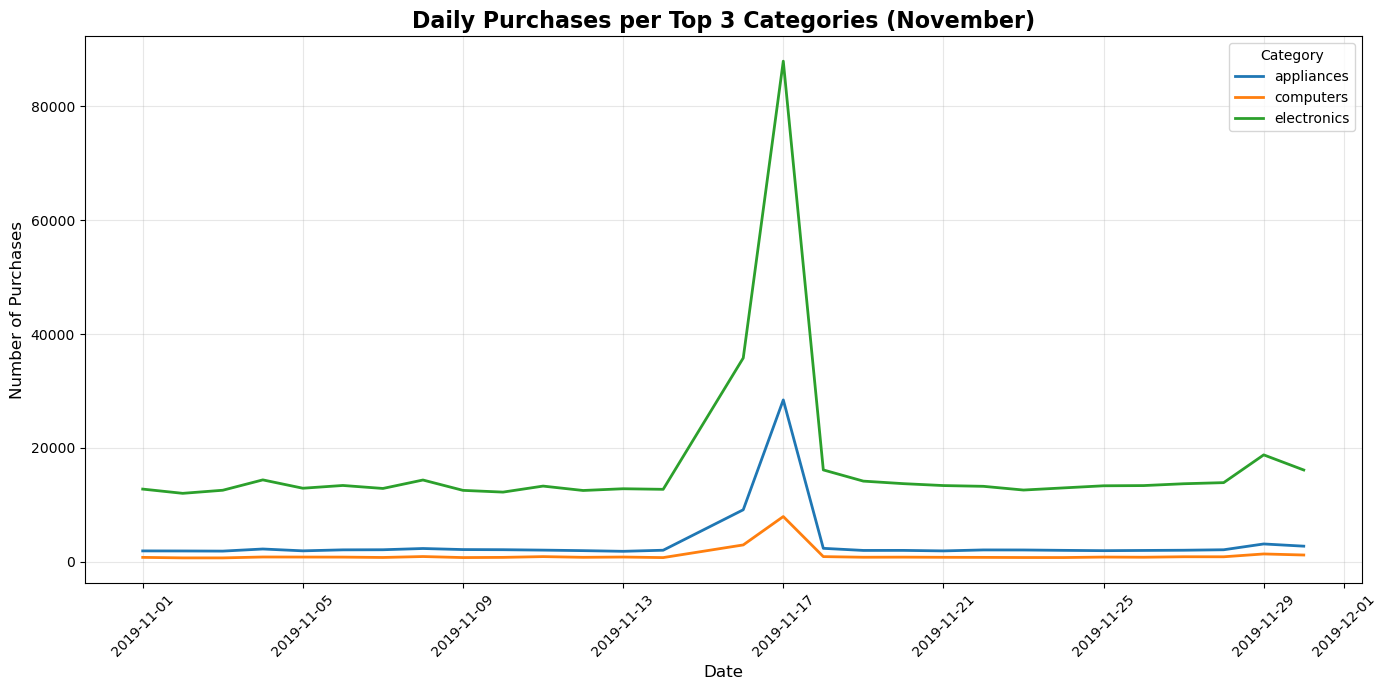

In [14]:
# Filter purchase events for November and group by category and day
top_3_categories_nov = category_sales_nov.nlargest(3).index
purchase_ts_nov = df_11[
    (df_11['event_type'] == 'purchase') & (df_11['primary_category'].isin(top_3_categories_nov))
]
purchase_ts_nov = purchase_ts_nov.groupby(['primary_category', purchase_ts_nov['event_time'].dt.date]).size().unstack(0)

# Plot time series for November with enhanced aesthetics
plt.figure(figsize=(14, 7))
for category in purchase_ts_nov.columns:
    plt.plot(purchase_ts_nov.index, purchase_ts_nov[category], label=category, linewidth=2)

plt.title('Daily Purchases per Top 3 Categories (November)', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

For December:

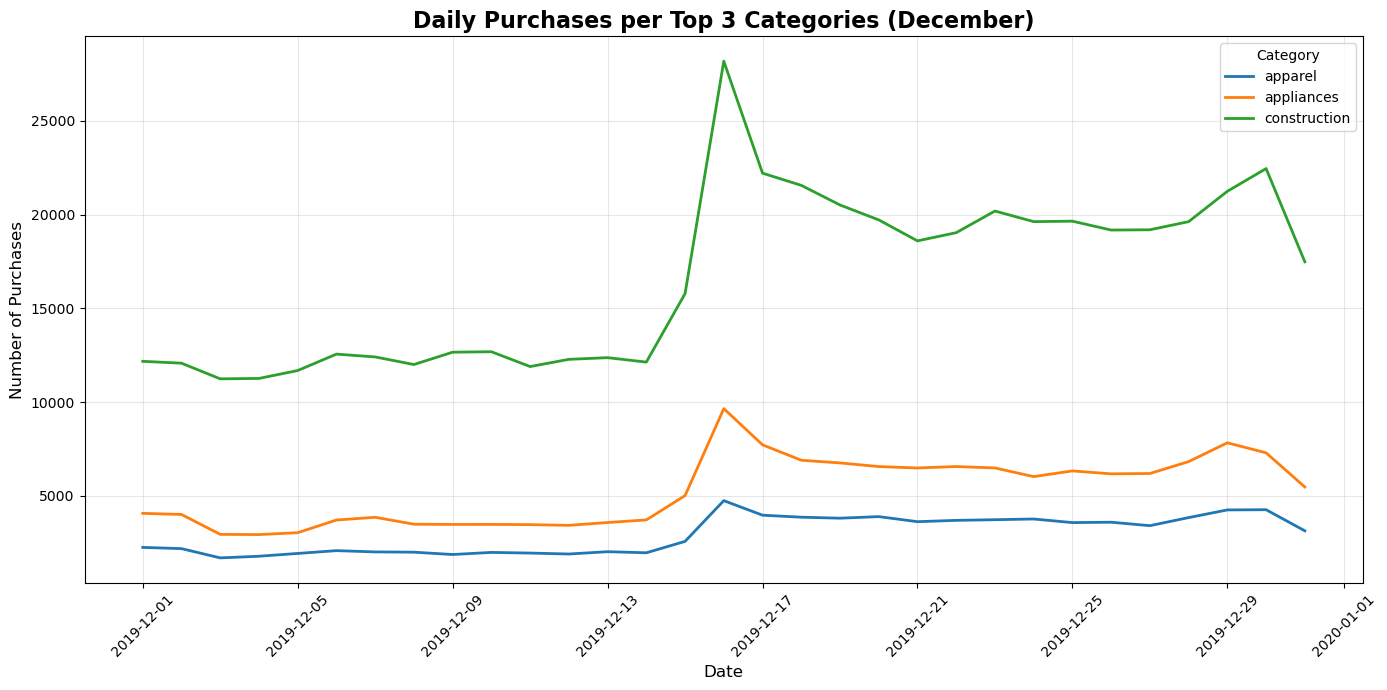

In [18]:
# Filter purchase events for December and group by category and day
top_3_categories_dec = category_sales_dec.nlargest(3).index
purchase_ts_dec = df_12[
    (df_12['event_type'] == 'purchase') & (df_12['primary_category'].isin(top_3_categories_dec))
]
purchase_ts_dec = purchase_ts_dec.groupby(['primary_category', purchase_ts_dec['event_time'].dt.date]).size().unstack(0)

# Plot time series for December with enhanced aesthetics
plt.figure(figsize=(14, 7))
for category in purchase_ts_dec.columns:
    plt.plot(purchase_ts_dec.index, purchase_ts_dec[category], label=category, linewidth=2)

plt.title('Daily Purchases per Top 3 Categories (December)', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

__3.⁠ ⁠graph showing the lowest conversion to purchase bar graph__

For November:

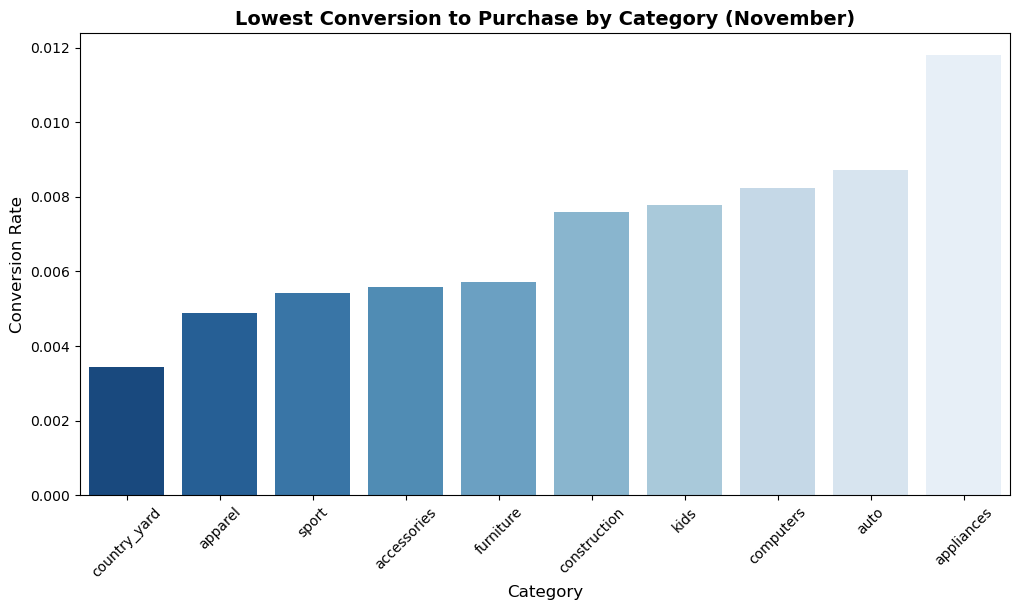

In [15]:
# Calculate conversion rate for November
events_nov = df_11.groupby('primary_category')['event_type'].value_counts().unstack().fillna(0)
events_nov['conversion_rate'] = events_nov['purchase'] / events_nov.sum(axis=1)

# Sort by lowest conversion rate
lowest_conversion_nov = events_nov['conversion_rate'].nsmallest(10)

# Plot bar graph for November
plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_conversion_nov.index, y=lowest_conversion_nov, palette='Blues_r')
plt.title('Lowest Conversion to Purchase by Category (November)', fontsize=14, weight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()

For December:

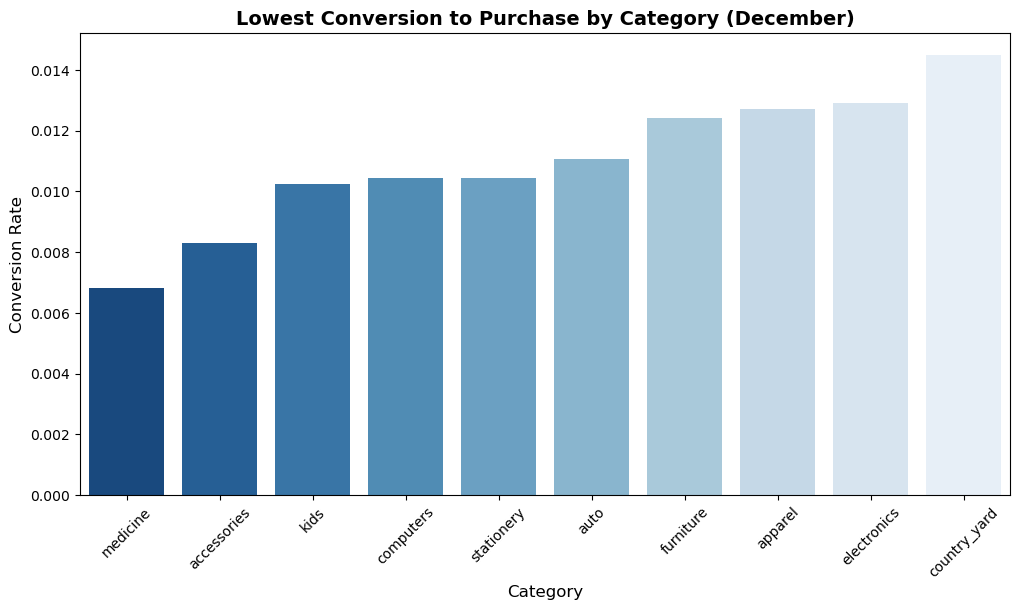

In [19]:
# Calculate conversion rate for December
events_dec = df_12.groupby('primary_category')['event_type'].value_counts().unstack().fillna(0)
events_dec['conversion_rate'] = events_dec['purchase'] / events_dec.sum(axis=1)

# Sort by lowest conversion rate
lowest_conversion_dec = events_dec['conversion_rate'].nsmallest(10)

# Plot bar graph for December
plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_conversion_dec.index, y=lowest_conversion_dec, palette='Blues_r')
plt.title('Lowest Conversion to Purchase by Category (December)', fontsize=14, weight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()

__4.⁠ ⁠top performing categories bar graphs conversion highest to purchase__

For November:

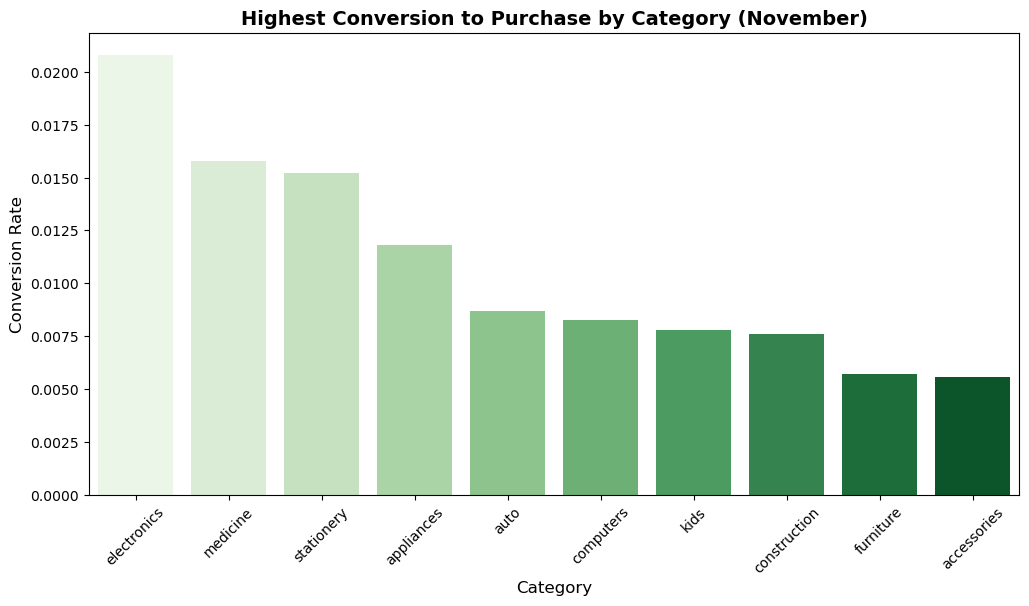

In [16]:
# Sort by highest conversion rate
highest_conversion_nov = events_nov['conversion_rate'].nlargest(10)

# Plot bar graph for November
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_conversion_nov.index, y=highest_conversion_nov, palette='Greens')
plt.title('Highest Conversion to Purchase by Category (November)', fontsize=14, weight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()

For December:

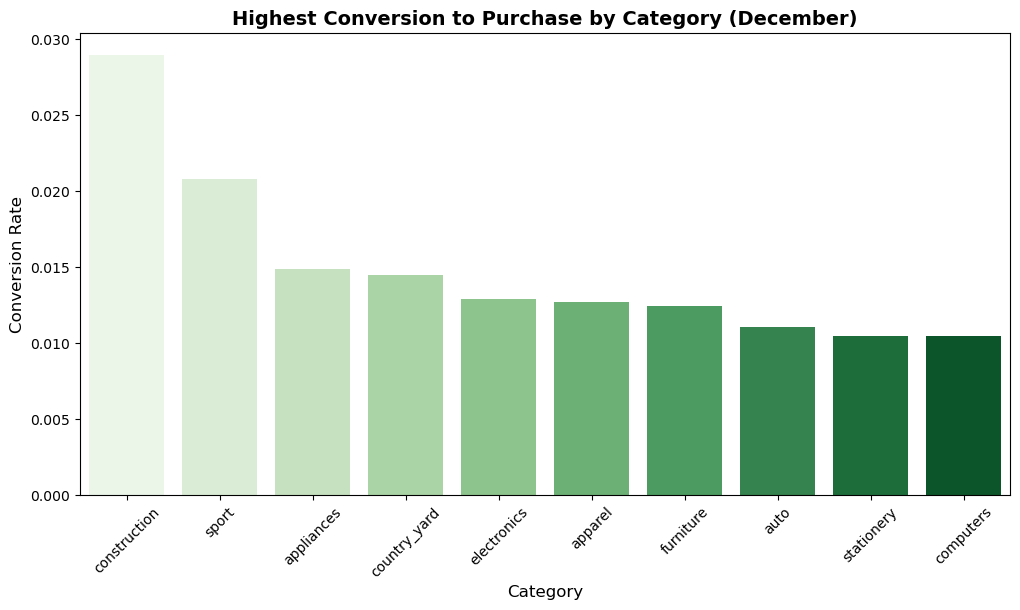

In [20]:
# Sort by highest conversion rate
highest_conversion_dec = events_dec['conversion_rate'].nlargest(10)

# Plot bar graph for December
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_conversion_dec.index, y=highest_conversion_dec, palette='Greens')
plt.title('Highest Conversion to Purchase by Category (December)', fontsize=14, weight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()